#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=0adee6559ae48b8069e937b58b9d5780c925f68bf7281790e4562a7fc4bf1cc7
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built MiniSom


### Importing the libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

##Training the SOM


In [0]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [0]:
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

##Visualizing the results


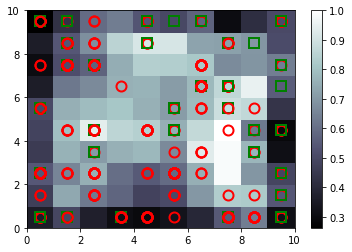

In [32]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)

## Finding the frauds


In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,5)], mappings[(5,9)]), axis=0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [40]:
print(frauds)

[[1.5570990e+07 1.0000000e+00 2.9420000e+01 1.2500000e+00 2.0000000e+00
  8.0000000e+00 8.0000000e+00 2.5000000e-01 0.0000000e+00 1.0000000e+00
  2.0000000e+00 1.0000000e+00 2.0000000e+00 4.0000000e+02 1.0900000e+02]
 [1.5704081e+07 1.0000000e+00 2.5170000e+01 3.5000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 6.2500000e-01 1.0000000e+00 1.0000000e+00
  7.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 7.0600000e+03]
 [1.5677112e+07 1.0000000e+00 2.7750000e+01 5.8500000e-01 1.0000000e+00
  1.3000000e+01 4.0000000e+00 2.5000000e-01 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 2.6000000e+02 5.0100000e+02]
 [1.5703177e+07 1.0000000e+00 3.0170000e+01 6.5000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 3.1250000e+00 1.0000000e+00 1.0000000e+00
  8.0000000e+00 0.0000000e+00 2.0000000e+00 3.3000000e+02 1.2010000e+03]
 [1.5733602e+07 1.0000000e+00 2.1830000e+01 1.1000000e+01 2.0000000e+00
  1.4000000e+01 4.0000000e+00 2.9000000e-01 1.0000000e+00 1.